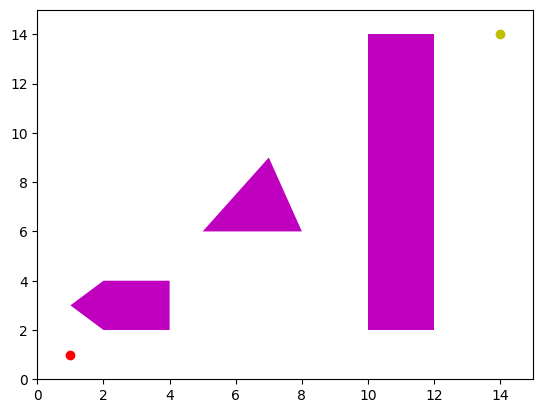

In [16]:
""" The goal of this code is to take a collection of polygons
    with integer coordinates and returns a path that traverses 
    the obstacles """

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

polygons = [[(1,1)],
            [(2,2), (4,2), (4,4), (2,4), (1,3)],
            [(5,6), (8,6), (7,9)],
            [(10,2), (12,2), (12,14), (10,14)],
            [(14,14)]]

start = polygons[0][0]
end = polygons[-1][0]

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,15])
ax.set_ylim([0,15])
plt.show()


In [17]:
def line_intersection(a, b, c, d):
    denom = ((a[0] - b[0]) * (c[1] - d[1]) - (a[1] - b[1]) * (c[0] - d[0]))
    if denom == 0:
        return False
    t = ((a[0] - c[0]) * (c[1] - d[1]) - (a[1] - c[1]) * (c[0] - d[0])) / denom
    u = ((a[0] - c[0]) * (a[1] - b[1]) - (a[1] - c[1]) * (a[0] - b[0])) / denom
    # check if line actually intersect
    if (0 <= t and t <= 1 and 0 <= u and u <= 1):
        return [a[0] + t * (b[0] - a[0]), a[1] + t * (b[1] - a[1])]
    else: 
        return False

def distance2(a,b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

D = dict()

def intersection(u, v):
    for p in polygons:
        N = len(p)
        r = distance2(u,v)
        for i in range(N):
            if(i < N - 1):
                z = line_intersection(u, v, p[i], p[i+1])
            if(i == N - 1):
                z = line_intersection(u, v, p[N-1], p[0])
            if(z):
                r2 = distance2(u,z)
                if(r2 < r and r2 > 0):
                    return True
    return False

for p in polygons:
    for q in polygons:
        if p == q:
            # We will deal with this case another time
            continue
        for u in p:
            for v in q:
                # We need to check if (u, v) intersects any polygon.
                # u and v are guaranteed to be on different polygons.
                if(intersection(u,v)):
                    D[(u,v)] = True


for i in D:
    print(i, D[i])

((1, 1), (4, 4)) True
((1, 1), (2, 4)) True
((1, 1), (5, 6)) True
((1, 1), (8, 6)) True
((1, 1), (7, 9)) True
((1, 1), (12, 14)) True
((1, 1), (10, 14)) True
((1, 1), (14, 14)) True
((4, 4), (1, 1)) True
((2, 4), (1, 1)) True
((2, 2), (5, 6)) True
((2, 2), (8, 6)) True
((2, 2), (7, 9)) True
((4, 2), (7, 9)) True
((4, 4), (7, 9)) True
((1, 3), (5, 6)) True
((1, 3), (8, 6)) True
((1, 3), (7, 9)) True
((2, 2), (10, 2)) True
((2, 2), (12, 2)) True
((2, 2), (12, 14)) True
((2, 2), (10, 14)) True
((4, 2), (12, 2)) True
((4, 2), (12, 14)) True
((4, 2), (10, 14)) True
((4, 4), (12, 2)) True
((4, 4), (12, 14)) True
((4, 4), (10, 14)) True
((2, 4), (10, 2)) True
((2, 4), (12, 2)) True
((2, 4), (12, 14)) True
((1, 3), (10, 2)) True
((1, 3), (12, 2)) True
((1, 3), (12, 14)) True
((2, 2), (14, 14)) True
((4, 2), (14, 14)) True
((4, 4), (14, 14)) True
((2, 4), (14, 14)) True
((1, 3), (14, 14)) True
((5, 6), (1, 1)) True
((8, 6), (1, 1)) True
((7, 9), (1, 1)) True
((5, 6), (2, 2)) True
((5, 6), (1, 3

In [18]:
polygons

[[(1, 1)],
 [(2, 2), (4, 2), (4, 4), (2, 4), (1, 3)],
 [(5, 6), (8, 6), (7, 9)],
 [(10, 2), (12, 2), (12, 14), (10, 14)],
 [(14, 14)]]

In [19]:
vertices = [x for xs in polygons for x in xs]
vertices

[(1, 1),
 (2, 2),
 (4, 2),
 (4, 4),
 (2, 4),
 (1, 3),
 (5, 6),
 (8, 6),
 (7, 9),
 (10, 2),
 (12, 2),
 (12, 14),
 (10, 14),
 (14, 14)]

In [20]:
DD = dict()
for x in vertices:
    for y in vertices:
        DD[(x,y)] = True
DD

{((1, 1), (1, 1)): True,
 ((1, 1), (2, 2)): True,
 ((1, 1), (4, 2)): True,
 ((1, 1), (4, 4)): True,
 ((1, 1), (2, 4)): True,
 ((1, 1), (1, 3)): True,
 ((1, 1), (5, 6)): True,
 ((1, 1), (8, 6)): True,
 ((1, 1), (7, 9)): True,
 ((1, 1), (10, 2)): True,
 ((1, 1), (12, 2)): True,
 ((1, 1), (12, 14)): True,
 ((1, 1), (10, 14)): True,
 ((1, 1), (14, 14)): True,
 ((2, 2), (1, 1)): True,
 ((2, 2), (2, 2)): True,
 ((2, 2), (4, 2)): True,
 ((2, 2), (4, 4)): True,
 ((2, 2), (2, 4)): True,
 ((2, 2), (1, 3)): True,
 ((2, 2), (5, 6)): True,
 ((2, 2), (8, 6)): True,
 ((2, 2), (7, 9)): True,
 ((2, 2), (10, 2)): True,
 ((2, 2), (12, 2)): True,
 ((2, 2), (12, 14)): True,
 ((2, 2), (10, 14)): True,
 ((2, 2), (14, 14)): True,
 ((4, 2), (1, 1)): True,
 ((4, 2), (2, 2)): True,
 ((4, 2), (4, 2)): True,
 ((4, 2), (4, 4)): True,
 ((4, 2), (2, 4)): True,
 ((4, 2), (1, 3)): True,
 ((4, 2), (5, 6)): True,
 ((4, 2), (8, 6)): True,
 ((4, 2), (7, 9)): True,
 ((4, 2), (10, 2)): True,
 ((4, 2), (12, 2)): True,
 ((4, 2

In [21]:
for i in D:
    if(D[i]):
        DD[i] = False

for i in DD:
    print(i, DD[i])

((1, 1), (1, 1)) True
((1, 1), (2, 2)) True
((1, 1), (4, 2)) True
((1, 1), (4, 4)) False
((1, 1), (2, 4)) False
((1, 1), (1, 3)) True
((1, 1), (5, 6)) False
((1, 1), (8, 6)) False
((1, 1), (7, 9)) False
((1, 1), (10, 2)) True
((1, 1), (12, 2)) True
((1, 1), (12, 14)) False
((1, 1), (10, 14)) False
((1, 1), (14, 14)) False
((2, 2), (1, 1)) True
((2, 2), (2, 2)) True
((2, 2), (4, 2)) True
((2, 2), (4, 4)) True
((2, 2), (2, 4)) True
((2, 2), (1, 3)) True
((2, 2), (5, 6)) False
((2, 2), (8, 6)) False
((2, 2), (7, 9)) False
((2, 2), (10, 2)) False
((2, 2), (12, 2)) False
((2, 2), (12, 14)) False
((2, 2), (10, 14)) False
((2, 2), (14, 14)) False
((4, 2), (1, 1)) True
((4, 2), (2, 2)) True
((4, 2), (4, 2)) True
((4, 2), (4, 4)) True
((4, 2), (2, 4)) True
((4, 2), (1, 3)) True
((4, 2), (5, 6)) True
((4, 2), (8, 6)) True
((4, 2), (7, 9)) False
((4, 2), (10, 2)) True
((4, 2), (12, 2)) False
((4, 2), (12, 14)) False
((4, 2), (10, 14)) False
((4, 2), (14, 14)) False
((4, 4), (1, 1)) False
((4, 4),